In [13]:
#reading dataset 1806269
import pandas as pd
import numpy as np
dat=pd.read_csv("/content/1806269.csv")
data=pd.DataFrame(dat)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200780383,MEIJ corporation,2019-09-26 00:00:00,2019.0,1.929861e+09,2019-09-11,20190910,20190911,20190926.0,USD,RV,1.0,NaN,51844.76,20190911.0,NAA8,1.929861e+09,0
1,U001,0200762301,C&S WH corporation,2019-09-10 00:00:00,2019.0,1.929789e+09,2019-08-25,20190824,20190825,20190909.0,USD,RV,1.0,NaN,62110.39,20190825.0,NAC6,1.929789e+09,0
2,U001,0200769623,WAL-MAR corporation,2020-02-18 00:00:00,2020.0,1.930488e+09,2020-02-05,20200206,20200205,20200220.0,USD,RV,1.0,NaN,41038.47,20200205.0,NAH4,1.930488e+09,0
3,U001,100053926,CALD trust,2019-08-21 00:00:00,2019.0,1.929519e+09,2019-06-20,20190620,20190620,20190819.0,USD,RV,1.0,NaN,1382.94,20190620.0,NAVQ,1.929519e+09,0
4,U001,0200739534,OK llc,2019-06-26 00:00:00,2019.0,1.929456e+09,2019-06-07,20190607,20190607,20190622.0,USD,RV,1.0,NaN,85407.27,20190607.0,NAA8,1.929456e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930833e+09,2020-04-28,20200428,20200428,20200513.0,USD,RV,1.0,NaN,3360.35,20200428.0,NAH4,1.930833e+09,1
49996,U001,0200353024,DECA corporation,NaN,2020.0,1.930818e+09,2020-04-23,20200423,20200423,20200509.0,USD,RV,1.0,NaN,6598.36,20200416.0,NAM4,1.930818e+09,1
49997,U001,0200126819,MCLANE in,NaN,2020.0,1.930784e+09,2020-04-21,20200414,20200421,20200506.0,USD,RV,1.0,NaN,11168.64,20200421.0,NAA8,1.930784e+09,1
49998,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930716e+09,2020-03-30,20200328,20200330,20200414.0,USD,RV,1.0,NaN,13454.20,20200330.0,NAH4,1.930716e+09,1


In [14]:
data.shape

(50000, 19)

In [15]:
len(pd.unique(data['posting_id'])) #constant

1

In [ ]:
data.drop(columns=['posting_id'],inplace=True)#since constant column will not contribute so drop

In [18]:
#checking how many columns of the dataset have mean of null values to preprocess
for i in data.columns:
  print(i," ",data[i].isnull().mean())

business_code   0.0
cust_number   0.0
name_customer   0.0
clear_date   0.09058
buisness_year   0.0
doc_id   0.0
posting_date   0.0
document_create_date   0.0
document_create_date.1   0.0
due_in_date   0.0
invoice_currency   0.0
document type   0.0
area_business   1.0
total_open_amount   0.0
baseline_create_date   0.0
cust_payment_terms   0.0
invoice_id   0.00014
isOpen   0.0


In [19]:
#area_business have all null values so drop
data.drop(['area_business'],axis=1,inplace=True)

In [20]:
#invoice have some values null
data['invoice_id'].isnull().sum()

7

In [1]:
data.loc[data['invoice_id'].isnull()]#null values are not useful so drop

NameError: name 'data' is not defined

In [22]:
#drop 5 invoice having null values
data = data.dropna(axis=0, subset=['invoice_id'])

In [23]:
data['invoice_id'].isnull().sum()
#once again checking no of null values in invoice id

0

In [24]:
for i in data.columns:
  print(i)

business_code
cust_number
name_customer
clear_date
buisness_year
doc_id
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
document type
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


In [25]:
#no duplicate rows
data.duplicated().sum()

0

In [26]:
#checking duplicate columns:
data_t = data.T
data_t.duplicated().sum()


1

In [27]:
#displaying duplicated column
data_t[data_t.duplicated()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49960,49961,49962,49963,49964,49965,49966,49967,49968,49969,49970,49971,49972,49973,49974,49975,49976,49977,49978,49979,49980,49981,49982,49983,49984,49985,49986,49987,49988,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
invoice_id,1.92986e+09,1.92979e+09,1.93049e+09,1.92952e+09,1.92946e+09,1.92948e+09,1.93043e+09,1.92903e+09,2.96059e+09,1.92917e+09,2.96057e+09,1.92936e+09,1.9304e+09,1.93021e+09,1.92867e+09,2.96059e+09,1.92971e+09,1.92866e+09,1.92982e+09,1.92941e+09,1.92935e+09,1.92972e+09,1.99183e+09,1.99057e+09,1.92868e+09,1.9299e+09,1.92859e+09,1.92974e+09,1.92862e+09,1.92883e+09,2.96058e+09,1.9302e+09,1.92952e+09,1.92934e+09,1.92938e+09,1.92937e+09,1.93009e+09,1.92882e+09,1.92929e+09,1.92948e+09,...,1.93064e+09,1.93075e+09,1.93072e+09,2.96062e+09,1.93064e+09,1.93067e+09,1.93067e+09,1.93085e+09,1.93062e+09,1.93083e+09,1.93079e+09,1.93068e+09,1.93057e+09,1.93085e+09,1.93071e+09,1.93083e+09,2.96063e+09,1.93064e+09,2.96063e+09,1.93058e+09,1.93072e+09,1.93059e+09,1.93061e+09,1.93081e+09,1.93071e+09,1.93081e+09,1.93071e+09,1.93069e+09,1.93082e+09,1.93072e+09,1.93065e+09,1.93078e+09,1.93073e+09,1.93072e+09,1.93071e+09,1.93083e+09,1.93082e+09,1.93078e+09,1.93072e+09,1.93075e+09


In [28]:
#no of rows before removing duplicated columns is 17
dt=data_t.T
dt.shape

(49993, 17)

In [29]:

#after removing duplicate column, 16 columns
data_unique = data_t.drop_duplicates(keep='first').T
data_unique.shape

(49993, 16)

In [30]:
#once again checking duplicated rows(of the transpose)
data_uni=data_unique.T
data_uni.duplicated().sum()

0

In [31]:
data_unique

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200780383,MEIJ corporation,2019-09-26 00:00:00,2019,1.92986e+09,2019-09-11,20190910,20190911,2.01909e+07,USD,RV,51844.8,2.01909e+07,NAA8,0
1,U001,0200762301,C&S WH corporation,2019-09-10 00:00:00,2019,1.92979e+09,2019-08-25,20190824,20190825,2.01909e+07,USD,RV,62110.4,2.01908e+07,NAC6,0
2,U001,0200769623,WAL-MAR corporation,2020-02-18 00:00:00,2020,1.93049e+09,2020-02-05,20200206,20200205,2.02002e+07,USD,RV,41038.5,2.02002e+07,NAH4,0
3,U001,100053926,CALD trust,2019-08-21 00:00:00,2019,1.92952e+09,2019-06-20,20190620,20190620,2.01908e+07,USD,RV,1382.94,2.01906e+07,NAVQ,0
4,U001,0200739534,OK llc,2019-06-26 00:00:00,2019,1.92946e+09,2019-06-07,20190607,20190607,2.01906e+07,USD,RV,85407.3,2.01906e+07,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR corp,NaN,2020,1.93083e+09,2020-04-28,20200428,20200428,2.02005e+07,USD,RV,3360.35,2.02004e+07,NAH4,1
49996,U001,0200353024,DECA corporation,NaN,2020,1.93082e+09,2020-04-23,20200423,20200423,2.02005e+07,USD,RV,6598.36,2.02004e+07,NAM4,1
49997,U001,0200126819,MCLANE in,NaN,2020,1.93078e+09,2020-04-21,20200414,20200421,2.02005e+07,USD,RV,11168.6,2.02004e+07,NAA8,1
49998,U001,0200769623,WAL-MAR associates,NaN,2020,1.93072e+09,2020-03-30,20200328,20200330,2.02004e+07,USD,RV,13454.2,2.02003e+07,NAH4,1


In [32]:
#document type is constant
len(pd.unique(data_unique['document type']))

1

In [33]:
#drop cons column
data_unique.drop(columns=['document type'],inplace=True)

In [34]:
data_unique.groupby(['buisness_year'])['buisness_year'].agg({'count'})

,count
buisness_year,
2019.0,39470
2020.0,10523


In [35]:
data_unique.shape

(49993, 15)

In [36]:
#converting to datetime format
data_unique['document_create_date']=pd.to_datetime(data_unique['document_create_date'].astype(int).astype(str))
data_unique['clear_date']= pd.to_datetime(data_unique['clear_date'])
data_unique['due_in_date']= pd.to_datetime(data_unique['due_in_date'].astype(int).astype(str))
data_unique['document_create_date.1']= pd.to_datetime(data_unique['document_create_date.1'].astype(int).astype(str))
data_unique['posting_date']= pd.to_datetime(data_unique['posting_date'])
data_unique['baseline_create_date']= pd.to_datetime(data_unique['baseline_create_date'].astype(int).astype(str))


In [37]:
############splitting into test set and big dataset based on clear date##########3

In [38]:
#divide test set 
test_data=data_unique[data_unique.clear_date.isnull()].reset_index(drop=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200772670,ASSOCIAT corp,NaT,2020,1.93066e+09,2020-03-16,2020-03-16,2020-03-16,2020-03-31,USD,57201.3,2020-03-16,NAU5,1
1,U001,0200769623,WAL-MAR llc,NaT,2020,1.93086e+09,2020-05-05,2020-05-04,2020-05-05,2020-05-20,USD,39687.8,2020-05-05,NAH4,1
2,U001,0200769623,WAL-MAR in,NaT,2020,1.93072e+09,2020-03-31,2020-03-30,2020-03-31,2020-04-15,USD,18533.3,2020-03-31,NAH4,1
3,CA02,0140104440,SO llc,NaT,2020,2.96062e+09,2020-03-17,2020-03-17,2020-03-17,2020-03-27,CAD,85103.7,2020-03-17,CA10,1
4,U001,0200772595,SAFEW,NaT,2020,1.93067e+09,2020-03-20,2020-03-18,2020-03-20,2020-04-04,USD,115623,2020-03-20,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,U001,0200769623,WAL-MAR corp,NaT,2020,1.93083e+09,2020-04-28,2020-04-28,2020-04-28,2020-05-13,USD,3360.35,2020-04-28,NAH4,1
4525,U001,0200353024,DECA corporation,NaT,2020,1.93082e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-09,USD,6598.36,2020-04-16,NAM4,1
4526,U001,0200126819,MCLANE in,NaT,2020,1.93078e+09,2020-04-21,2020-04-14,2020-04-21,2020-05-06,USD,11168.6,2020-04-21,NAA8,1
4527,U001,0200769623,WAL-MAR associates,NaT,2020,1.93072e+09,2020-03-30,2020-03-28,2020-03-30,2020-04-14,USD,13454.2,2020-03-30,NAH4,1


In [39]:
#creating rest bigdata set
big_set=data_unique[data_unique.clear_date.notnull()].reset_index(drop=True)
big_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200780383,MEIJ corporation,2019-09-26,2019,1.92986e+09,2019-09-11,2019-09-10,2019-09-11,2019-09-26,USD,51844.8,2019-09-11,NAA8,0
1,U001,0200762301,C&S WH corporation,2019-09-10,2019,1.92979e+09,2019-08-25,2019-08-24,2019-08-25,2019-09-09,USD,62110.4,2019-08-25,NAC6,0
2,U001,0200769623,WAL-MAR corporation,2020-02-18,2020,1.93049e+09,2020-02-05,2020-02-06,2020-02-05,2020-02-20,USD,41038.5,2020-02-05,NAH4,0
3,U001,100053926,CALD trust,2019-08-21,2019,1.92952e+09,2019-06-20,2019-06-20,2019-06-20,2019-08-19,USD,1382.94,2019-06-20,NAVQ,0
4,U001,0200739534,OK llc,2019-06-26,2019,1.92946e+09,2019-06-07,2019-06-07,2019-06-07,2019-06-22,USD,85407.3,2019-06-07,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,CA02,0140104229,A & W F trust,2020-03-02,2020,2.96061e+09,2020-01-23,2020-01-23,2020-01-23,2020-02-02,CAD,7380.72,2020-01-23,CA10,0
45460,U001,0200792734,MDV/ systems,2019-10-30,2019,1.92977e+09,2019-08-27,2019-08-21,2019-08-27,2019-10-31,USD,11949.1,2019-08-27,NAGD,0
45461,CA02,0140106099,SOCIETE foundation,2019-05-09,2019,2.96054e+09,2019-04-24,2019-04-24,2019-04-24,2019-05-06,CAD,27441,2019-04-26,CA10,0
45462,U001,200126819,MCLANE trust,2019-02-13,2019,1.92865e+09,2019-01-24,2019-01-21,2019-01-24,2019-02-08,USD,13976,2019-01-24,NAA8,0


In [40]:
df1=big_set[big_set['document_create_date.1']>big_set['clear_date']] ##checking if create date.1 is after than clear date
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen


In [41]:
#Finding min and max dates of create dat.1 of test case
min_dt_test=test_data['document_create_date.1'].min()
max_dt_test=test_data['document_create_date.1'].max()
print("Min create date 1",min_dt_test,"Max create date 1",max_dt_test)

Min create date 1 2020-02-27 00:00:00 Max create date 1 2020-05-25 00:00:00


In [42]:
#Finding min and max dates of create dat.1 of big_set
min_dt_big=big_set['document_create_date.1'].min()
max_dt_big=big_set['document_create_date.1'].max()
print("Min create date 1",min_dt_big,"Max create date 1",max_dt_big)

Min create date 1 2018-12-30 00:00:00 Max create date 1 2020-02-27 00:00:00


In [43]:
test_data.shape

(4529, 15)

In [44]:
###################splitting big_set to train set, val2, val1 based on document_create_date.1####################

In [45]:
#splitting to validation set 2
val2=big_set[big_set['document_create_date.1'] >= '2020-01-16'].copy()
val2.shape

(4344, 15)

In [46]:
val2.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR corporation,2020-02-18,2020,1.93049e+09,2020-02-05,2020-02-06,2020-02-05,2020-02-20,USD,41038.5,2020-02-05,NAH4,0
1,U001,0200726979,BJ'S foundation,2020-02-06,2020,1.93043e+09,2020-01-21,2020-01-22,2020-01-21,2020-02-05,USD,344.72,2020-01-21,NAA8,0
2,U001,0200794332,COST associates,2020-02-05,2020,1.9304e+09,2020-01-17,2020-01-15,2020-01-17,2020-02-01,USD,30220,2020-01-17,NAAX,0
3,U001,0200148860,DOLLA in,2020-02-06,2020,1.93042e+09,2020-01-22,2020-01-20,2020-01-22,2020-02-06,USD,15764,2020-01-22,NAA8,0
4,U001,0200794332,COST llc,2020-03-12,2020,1.93057e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,8793.09,2020-02-27,NAAX,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,U001,0200020431,DEC trust,2020-01-27,2020,1.93043e+09,2020-01-22,2020-01-22,2020-01-22,2020-01-26,USD,17842.9,2020-01-16,NAM2,0
4340,U001,0200762301,C&S WH co,2020-03-04,2020,1.93053e+09,2020-02-18,2020-02-17,2020-02-18,2020-03-04,USD,9063.93,2020-02-18,NAC6,0
4341,U001,CCU013,KRAFT F systems,2020-03-27,2020,1.93052e+09,2020-02-15,2020-02-11,2020-02-15,2020-02-15,USD,4275.26,2020-02-15,NAX2,0
4342,U001,0200762301,C&S WH,2020-02-19,2020,1.93047e+09,2020-02-04,2020-02-02,2020-02-04,2020-02-19,USD,51066.6,2020-02-04,NAC6,0


In [47]:
#removing validation set 2 from big_set
big_set.drop(big_set[big_set['document_create_date.1'] >= '2020-01-16'].index, inplace = True)
big_set['document_create_date.1'].max()

Timestamp('2020-01-15 00:00:00')

In [48]:
#splitting rest big set to val1 and train set
val1=big_set[big_set['document_create_date.1'] >= '2019-12-05'].copy()
val1.shape

(2962, 15)

In [49]:
val1.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U002,0200806643,PLAZA WA co,2020-02-18,2020,1.99057e+09,2020-01-10,2020-01-06,2020-01-10,2020-02-14,USD,1264.01,2020-01-10,NAG2,0
1,U001,0200769623,WAL-MAR co,2020-01-21,2020,1.93039e+09,2020-01-10,2020-01-10,2020-01-10,2020-01-25,USD,943.12,2020-01-10,NAH4,0
2,U001,0200769623,WAL-MAR associates,2019-12-27,2019,1.93028e+09,2019-12-17,2019-12-15,2019-12-17,2020-01-01,USD,34878.9,2019-12-17,NAH4,0
3,U001,0200744019,TARG llc,2019-12-26,2019,1.93022e+09,2019-12-07,2019-12-05,2019-12-07,2019-12-22,USD,27710,2019-12-07,NAA8,0
4,U001,0200700919,US,2019-12-30,2019,1.93027e+09,2019-12-12,2019-12-12,2019-12-12,2019-12-27,USD,72343.1,2019-12-12,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,U001,0200744019,TARG corp,2020-01-24,2020,1.93038e+09,2020-01-09,2020-01-09,2020-01-09,2020-01-24,USD,44346.1,2020-01-09,NAA8,0
2958,U001,0200726979,BJ'S,2019-12-26,2019,1.93026e+09,2019-12-11,2019-12-11,2019-12-11,2019-12-26,USD,502.72,2019-12-11,NAA8,0
2959,U001,0200705372,FR trust,2019-12-31,2019,1.93028e+09,2019-12-16,2019-12-14,2019-12-16,2019-12-31,USD,57543.1,2019-12-16,NAA8,0
2960,U001,0200592182,DECA in,2020-01-15,2020,1.93039e+09,2020-01-13,2020-01-13,2020-01-13,2020-01-24,USD,914.9,2020-01-01,NAM4,0


In [50]:
train_set=big_set[big_set['document_create_date.1'] < '2019-12-05'].copy()
train_set.shape

(38158, 15)

In [51]:
train_set.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200780383,MEIJ corporation,2019-09-26,2019,1.92986e+09,2019-09-11,2019-09-10,2019-09-11,2019-09-26,USD,51844.8,2019-09-11,NAA8,0
1,U001,0200762301,C&S WH corporation,2019-09-10,2019,1.92979e+09,2019-08-25,2019-08-24,2019-08-25,2019-09-09,USD,62110.4,2019-08-25,NAC6,0
2,U001,100053926,CALD trust,2019-08-21,2019,1.92952e+09,2019-06-20,2019-06-20,2019-06-20,2019-08-19,USD,1382.94,2019-06-20,NAVQ,0
3,U001,0200739534,OK llc,2019-06-26,2019,1.92946e+09,2019-06-07,2019-06-07,2019-06-07,2019-06-22,USD,85407.3,2019-06-07,NAA8,0
4,U001,0200337148,COAS co,2019-06-27,2019,1.92948e+09,2019-06-12,2019-06-12,2019-06-12,2019-06-27,USD,47117.7,2019-06-12,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38153,U001,0200769623,WAL-MAR associates,2019-02-27,2019,1.9288e+09,2019-02-15,2019-02-14,2019-02-15,2019-03-02,USD,10435.8,2019-02-15,NAH4,0
38154,U001,0200792734,MDV/ systems,2019-10-30,2019,1.92977e+09,2019-08-27,2019-08-21,2019-08-27,2019-10-31,USD,11949.1,2019-08-27,NAGD,0
38155,CA02,0140106099,SOCIETE foundation,2019-05-09,2019,2.96054e+09,2019-04-24,2019-04-24,2019-04-24,2019-05-06,CAD,27441,2019-04-26,CA10,0
38156,U001,200126819,MCLANE trust,2019-02-13,2019,1.92865e+09,2019-01-24,2019-01-21,2019-01-24,2019-02-08,USD,13976,2019-01-24,NAA8,0


In [52]:
##############target label#################

In [53]:
train_set['target_delay']=(train_set['clear_date'] - train_set['due_in_date'])
train_set['target_delay']=train_set['target_delay'].dt.days


In [54]:
train_set.corr()

,target_delay
target_delay,1.0


In [55]:
train_set['target_delay'].describe()


count    38158.000000
mean         1.068714
std         11.109426
min        -81.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        212.000000
Name: target_delay, dtype: float64

In [56]:
#setting target_delay in val1 and  val2
val1['target_delay']=(val1['clear_date'] - val1['due_in_date'])
val1['target_delay']=val1['target_delay'].dt.days

val2['target_delay']=(val2['clear_date'] - val2['due_in_date'])
val2['target_delay']=val2['target_delay'].dt.days



In [57]:
###############################EDA and Feauture Engineering##########################

In [58]:
import seaborn as sns, numpy as np

In [59]:
########ENCODING STRING COLUMNS################ 

In [60]:
#encoding the train_set
train_set.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                 object
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                            object
target_delay                       int64
dtype: object

In [61]:
#converting to numerical columns

#1.Business code
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_set.groupby(['business_code']).count()



,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
business_code,,,,,,,,,,,,,,,
CA02,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100
U001,34393,34393,34393,34393,34393,34393,34393,34393,34393,34393,34393,34393,34393,34393,34393
U002,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
U005,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
U013,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514


In [62]:
#label encoding in business code
labelencoder = LabelEncoder()

train_set['business_code'] = labelencoder.fit_transform(train_set['business_code'])
test_data['business_code'] = labelencoder.transform(test_data['business_code'])

val1['business_code'] = labelencoder.transform(val1['business_code'])

val2['business_code'] = labelencoder.transform(val2['business_code'])

train_set




,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
0,1,0200780383,MEIJ corporation,2019-09-26,2019,1.92986e+09,2019-09-11,2019-09-10,2019-09-11,2019-09-26,USD,51844.8,2019-09-11,NAA8,0,0
1,1,0200762301,C&S WH corporation,2019-09-10,2019,1.92979e+09,2019-08-25,2019-08-24,2019-08-25,2019-09-09,USD,62110.4,2019-08-25,NAC6,0,1
3,1,100053926,CALD trust,2019-08-21,2019,1.92952e+09,2019-06-20,2019-06-20,2019-06-20,2019-08-19,USD,1382.94,2019-06-20,NAVQ,0,2
4,1,0200739534,OK llc,2019-06-26,2019,1.92946e+09,2019-06-07,2019-06-07,2019-06-07,2019-06-22,USD,85407.3,2019-06-07,NAA8,0,4
5,1,0200337148,COAS co,2019-06-27,2019,1.92948e+09,2019-06-12,2019-06-12,2019-06-12,2019-06-27,USD,47117.7,2019-06-12,NAA8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,1,0200769623,WAL-MAR associates,2019-02-27,2019,1.9288e+09,2019-02-15,2019-02-14,2019-02-15,2019-03-02,USD,10435.8,2019-02-15,NAH4,0,-3
45460,1,0200792734,MDV/ systems,2019-10-30,2019,1.92977e+09,2019-08-27,2019-08-21,2019-08-27,2019-10-31,USD,11949.1,2019-08-27,NAGD,0,-1
45461,0,0140106099,SOCIETE foundation,2019-05-09,2019,2.96054e+09,2019-04-24,2019-04-24,2019-04-24,2019-05-06,CAD,27441,2019-04-26,CA10,0,3
45462,1,200126819,MCLANE trust,2019-02-13,2019,1.92865e+09,2019-01-24,2019-01-21,2019-01-24,2019-02-08,USD,13976,2019-01-24,NAA8,0,5


In [63]:
train_set['business_code'].describe()

count    38158.000000
mean         0.963415
std          0.453831
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: business_code, dtype: float64

In [64]:
train_set['business_code'].corr(train_set['target_delay'])

-0.005484321398166932

In [65]:
#### checking for customer number
len(pd.unique(train_set['cust_number'])) 


1362

In [66]:
###business year is constant drop
train_set.drop(['buisness_year'],axis=1,inplace=True)

In [67]:
len(pd.unique(train_set['cust_payment_terms'])) 

71

In [68]:
#replace cust_payment_terms having values < 12 as others and then encoding
threshlold = 0.000250
   
    # locate all the categories that are not rare.
counts = train_set.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_tst = test_data.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_val1 = val1.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_val2 = val2.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['cust_payment_terms'] = np.where(train_set['cust_payment_terms'].isin(frequent_labels), train_set['cust_payment_terms'], 'others')
test_data['cust_payment_terms'] = np.where(test_data['cust_payment_terms'].isin(frequent_labels_tst), test_data['cust_payment_terms'], 'others')
val1['cust_payment_terms'] = np.where(val1['cust_payment_terms'].isin(frequent_labels_val1), val1['cust_payment_terms'], 'others')
val2['cust_payment_terms'] = np.where(val2['cust_payment_terms'].isin(frequent_labels_val2), val2['cust_payment_terms'], 'others')


test_data['cust_payment_terms'].value_counts()


NAA8      1873
NAH4      1345
CA10       327
NAC6       192
NAM4       134
NAGD       131
NAAX        98
NAU5        97
NAM2        52
NAG2        43
others      40
NAD1        38
NA32        37
NA10        28
NAX2        23
NAD5        21
NAAW        20
NAM1        18
NAVE        12
Name: cust_payment_terms, dtype: int64

In [69]:
train_set['cust_payment_terms'] = labelencoder.fit_transform(train_set['cust_payment_terms'])
test_data['cust_payment_terms'] = labelencoder.transform(test_data['cust_payment_terms'])
val1['cust_payment_terms'] = labelencoder.transform(val1['cust_payment_terms'])
val2['cust_payment_terms'] = labelencoder.transform(val2['cust_payment_terms'])
train_set['cust_payment_terms'].max()

37

In [70]:
##Now similarly encoding name_customer
len(pd.unique(train_set['name_customer'])) 

3895

In [71]:
threshlold = 0.000100
####Grouping rare labels as others
counts = train_set.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_tst = test_data.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_val1 = val1.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_val2 = val2.groupby(['name_customer'])['name_customer'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['name_customer'] = np.where(train_set['name_customer'].isin(frequent_labels), train_set['name_customer'], 'others')
test_data['name_customer'] = np.where(test_data['name_customer'].isin(frequent_labels_tst), test_data['name_customer'], 'others')
val1['name_customer'] = np.where(val1['name_customer'].isin(frequent_labels_val1), val1['name_customer'], 'others')
val2['name_customer'] = np.where(val2['name_customer'].isin(frequent_labels_val2), val2['name_customer'], 'others')


test_data['name_customer'].value_counts()


others                1342
WAL-MAR in             127
WAL-MAR foundation     121
WAL-MAR systems        120
WAL-MAR trust          116
                      ... 
DOT llc                  4
US  corp                 4
DECA associates          4
SAFEW corp               4
SAFEW co                 4
Name: name_customer, Length: 256, dtype: int64

In [72]:
train_set['name_customer'].value_counts()


others               3798
WAL-MAR corp          854
WAL-MAR co            837
WAL-MAR llc           827
WAL-MAR trust         819
                     ... 
BAS co                  4
RICH                    4
BARGAIN  corp           4
ASSOCI associates       4
SCHNU foundation        4
Name: name_customer, Length: 1269, dtype: int64

In [73]:
#target encoding in name customer
target_mapper = train_set.groupby('name_customer')['target_delay'].mean().to_dict()
train_set['name_customer'] = train_set['name_customer'].map(target_mapper)
test_data['name_customer'] = test_data['name_customer'].map(target_mapper)
val1['name_customer'] = val1['name_customer'].map(target_mapper)
val2['name_customer'] = val2['name_customer'].map(target_mapper)
train_set


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
0,1,0200780383,2.076923,2019-09-26,1.92986e+09,2019-09-11,2019-09-10,2019-09-11,2019-09-26,USD,51844.8,2019-09-11,9,0,0
1,1,0200762301,0.078947,2019-09-10,1.92979e+09,2019-08-25,2019-08-24,2019-08-25,2019-09-09,USD,62110.4,2019-08-25,14,0,1
3,1,100053926,2.243023,2019-08-21,1.92952e+09,2019-06-20,2019-06-20,2019-06-20,2019-08-19,USD,1382.94,2019-06-20,31,0,2
4,1,0200739534,1.133333,2019-06-26,1.92946e+09,2019-06-07,2019-06-07,2019-06-07,2019-06-22,USD,85407.3,2019-06-07,9,0,4
5,1,0200337148,-0.333333,2019-06-27,1.92948e+09,2019-06-12,2019-06-12,2019-06-12,2019-06-27,USD,47117.7,2019-06-12,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,1,0200769623,-2.286070,2019-02-27,1.9288e+09,2019-02-15,2019-02-14,2019-02-15,2019-03-02,USD,10435.8,2019-02-15,21,0,-3
45460,1,0200792734,0.812500,2019-10-30,1.92977e+09,2019-08-27,2019-08-21,2019-08-27,2019-10-31,USD,11949.1,2019-08-27,20,0,-1
45461,0,0140106099,2.243023,2019-05-09,2.96054e+09,2019-04-24,2019-04-24,2019-04-24,2019-05-06,CAD,27441,2019-04-26,1,0,3
45462,1,200126819,4.714286,2019-02-13,1.92865e+09,2019-01-24,2019-01-21,2019-01-24,2019-02-08,USD,13976,2019-01-24,9,0,5


In [74]:
len(pd.unique(train_set['name_customer'])) 


734

In [75]:
train_set['name_customer'].corr(train_set['target_delay'])

0.5921522380097841

In [77]:
###similarly encoding cust_numbers
threshlold = 0.000250

# we loop over all the categorical variables

    
    # locate all the categories that are not rare.
counts = train_set.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_tst = test_data.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_val1 = val1.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_val2 = val2.groupby(['cust_number'])['cust_number'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['cust_number'] = np.where(train_set['cust_number'].isin(frequent_labels), train_set['cust_number'], 'others')
test_data['cust_number'] = np.where(test_data['cust_number'].isin(frequent_labels_tst), test_data['cust_number'], 'others')
val1['cust_number'] = np.where(val1['cust_number'].isin(frequent_labels_val1), val1['cust_number'], 'others')
val2['cust_number'] = np.where(val2['cust_number'].isin(frequent_labels_val2), val2['cust_number'], 'others')


test_data['cust_number'].value_counts()



0200769623    1135
others         935
0200762301     179
0200726979     159
0200744019     144
              ... 
0200920735      10
0200466603      10
0200290370      10
0200714710      10
0200455322      10
Name: cust_number, Length: 81, dtype: int64

In [78]:
target_mapper = train_set.groupby('cust_number')['target_delay'].mean().to_dict()
train_set['cust_number'] = train_set['cust_number'].map(target_mapper)
test_data['cust_number'] = test_data['cust_number'].map(target_mapper)
val1['cust_number'] = val1['cust_number'].map(target_mapper)
val2['cust_number'] = val2['cust_number'].map(target_mapper)


In [79]:
train_set['cust_number'].corr(train_set['target_delay'])

0.591095241388198

In [80]:
train_set.dtypes

business_code                      int64
cust_number                      float64
name_customer                    float64
clear_date                datetime64[ns]
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                 object
baseline_create_date      datetime64[ns]
cust_payment_terms                 int64
isOpen                            object
target_delay                       int64
dtype: object

In [81]:
train_set['doc_id'].unique

<bound method Series.unique of 0        1.92986e+09
1        1.92979e+09
3        1.92952e+09
4        1.92946e+09
5        1.92948e+09
            ...     
45458     1.9288e+09
45460    1.92977e+09
45461    2.96054e+09
45462    1.92865e+09
45463    1.92956e+09
Name: doc_id, Length: 38158, dtype: object>

In [82]:
train_set.shape #means doc_id is a unique value like primary key so we will not encode as it will not contribute in predicting

(38158, 15)

In [83]:
#encoding total_open_amount
train_set['total_open_amount']=train_set['total_open_amount'].astype(float)
test_data['total_open_amount']=test_data['total_open_amount'].astype(float)
val1['total_open_amount']=val1['total_open_amount'].astype(float)
val2['total_open_amount']=val2['total_open_amount'].astype(float)
train_set['total_open_amount']

0        51844.76
1        62110.39
3         1382.94
4        85407.27
5        47117.67
           ...   
45458    10435.76
45460    11949.09
45461    27441.05
45462    13975.95
45463     4343.40
Name: total_open_amount, Length: 38158, dtype: float64

In [84]:
train_set['total_open_amount'].corr(train_set['target_delay'])

0.0025659655256575417

In [85]:
#target encoding on isOpen
target_mapper = train_set.groupby('isOpen')['target_delay'].mean().to_dict()
train_set['isOpen'] = train_set['isOpen'].map(target_mapper)
test_data['isOpen'] = test_data['isOpen'].map(target_mapper)
val1['isOpen'] = val1['isOpen'].map(target_mapper)
val2['isOpen'] = val2['isOpen'].map(target_mapper)
train_set['isOpen']

0        1.068714
1        1.068714
3        1.068714
4        1.068714
5        1.068714
           ...   
45458    1.068714
45460    1.068714
45461    1.068714
45462    1.068714
45463    1.068714
Name: isOpen, Length: 38158, dtype: float64

In [86]:
train_set['isOpen'].corr(train_set['target_delay'])

nan

In [87]:
train_set.dtypes

business_code                      int64
cust_number                      float64
name_customer                    float64
clear_date                datetime64[ns]
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int64
isOpen                           float64
target_delay                       int64
dtype: object

In [88]:
train_set['invoice_currency'].value_counts()

USD    35057
CAD     3101
Name: invoice_currency, dtype: int64

In [89]:
#label encoding invoice currency
target_mapper = train_set.groupby('invoice_currency')['target_delay'].mean().to_dict()
train_set['invoice_currency'] = train_set['invoice_currency'].map(target_mapper)
test_data['invoice_currency'] = test_data['invoice_currency'].map(target_mapper)
val1['invoice_currency'] = val1['invoice_currency'].map(target_mapper)
val2['invoice_currency'] = val2['invoice_currency'].map(target_mapper)

train_set


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
0,1,1.529248,2.076923,2019-09-26,1.92986e+09,2019-09-11,2019-09-10,2019-09-11,2019-09-26,0.659298,51844.76,2019-09-11,9,1.068714,0
1,1,0.043478,0.078947,2019-09-10,1.92979e+09,2019-08-25,2019-08-24,2019-08-25,2019-09-09,0.659298,62110.39,2019-08-25,14,1.068714,1
3,1,2.436872,2.243023,2019-08-21,1.92952e+09,2019-06-20,2019-06-20,2019-06-20,2019-08-19,0.659298,1382.94,2019-06-20,31,1.068714,2
4,1,0.678571,1.133333,2019-06-26,1.92946e+09,2019-06-07,2019-06-07,2019-06-07,2019-06-22,0.659298,85407.27,2019-06-07,9,1.068714,4
5,1,-0.266667,-0.333333,2019-06-27,1.92948e+09,2019-06-12,2019-06-12,2019-06-12,2019-06-27,0.659298,47117.67,2019-06-12,9,1.068714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,1,-2.085551,-2.286070,2019-02-27,1.9288e+09,2019-02-15,2019-02-14,2019-02-15,2019-03-02,0.659298,10435.76,2019-02-15,21,1.068714,-3
45460,1,1.800000,0.812500,2019-10-30,1.92977e+09,2019-08-27,2019-08-21,2019-08-27,2019-10-31,0.659298,11949.09,2019-08-27,20,1.068714,-1
45461,0,2.436872,2.243023,2019-05-09,2.96054e+09,2019-04-24,2019-04-24,2019-04-24,2019-05-06,5.697194,27441.05,2019-04-26,1,1.068714,3
45462,1,2.436872,4.714286,2019-02-13,1.92865e+09,2019-01-24,2019-01-21,2019-01-24,2019-02-08,0.659298,13975.95,2019-01-24,9,1.068714,5


In [90]:
#creating month columns for all datetime type for caculating correlation

train_set['create_date_month']=train_set['document_create_date'].dt.month
train_set['create_date.1_month']=train_set['document_create_date.1'].dt.month
train_set['posting_date_month']=train_set['posting_date'].dt.month
train_set['baseline_create_date_month']=train_set['baseline_create_date'].dt.month
train_set['due_in_date_month']=train_set['due_in_date'].dt.month

train_set['create_date_quarter']=train_set['document_create_date'].dt.quarter
train_set['create_date.1_quarter']=train_set['document_create_date.1'].dt.quarter
train_set['posting_date_quarter']=train_set['posting_date'].dt.quarter
train_set['baseline_create_date_quarter']=train_set['baseline_create_date'].dt.quarter
train_set['due_in_date_quarter']=train_set['due_in_date'].dt.quarter

In [91]:
train_set.dtypes

business_code                            int64
cust_number                            float64
name_customer                          float64
clear_date                      datetime64[ns]
doc_id                                  object
posting_date                    datetime64[ns]
document_create_date            datetime64[ns]
document_create_date.1          datetime64[ns]
due_in_date                     datetime64[ns]
invoice_currency                       float64
total_open_amount                      float64
baseline_create_date            datetime64[ns]
cust_payment_terms                       int64
isOpen                                 float64
target_delay                             int64
create_date_month                        int64
create_date.1_month                      int64
posting_date_month                       int64
baseline_create_date_month               int64
due_in_date_month                        int64
create_date_quarter                      int64
create_date.1

In [92]:
####GRAPHS######

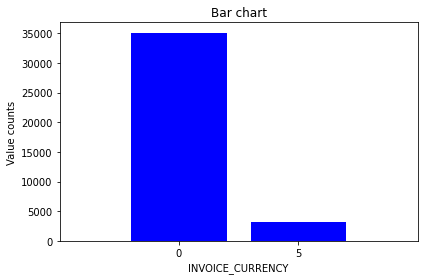

In [93]:
import matplotlib.pyplot as plt
grp_invoice=train_set.groupby('invoice_currency')['invoice_currency'].agg({'count'}).reset_index()
plt.bar(grp_invoice['invoice_currency'].astype(int).astype(str),grp_invoice['count'],color = 'b')
plt.xlabel('INVOICE_CURRENCY')
plt.xlim((-1,grp_invoice['invoice_currency'].nunique()))
plt.ylabel('Value counts')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
######we can infer that invoice_currency has USD as max value_count

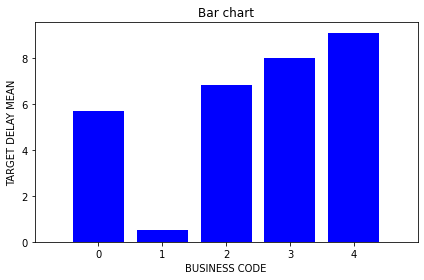

In [94]:
grp_bc=train_set.groupby('business_code')['target_delay'].agg({'mean'}).reset_index()

plt.bar(grp_bc['business_code'].astype(int).astype(str),grp_bc['mean'],color = 'b')
plt.xlabel('BUSINESS CODE')
plt.xlim((-1,grp_bc['business_code'].nunique()))
plt.ylabel('TARGET DELAY MEAN')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
###business code labeled 4 has max target_delay mean

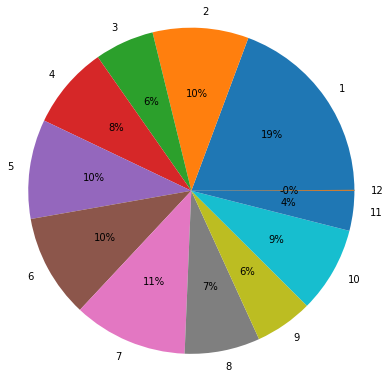

In [95]:
grp_posting_date_mnth=train_set.groupby('posting_date_month')['target_delay'].agg({'mean'}).reset_index()
plt.figure(figsize=(5,5))
plt.pie(grp_posting_date_mnth['mean'],labels=grp_posting_date_mnth['posting_date_month'],autopct='%1.0f%%',radius = 1.5)
plt.show()
##shows target_delay mean in percentage in every month wrt posting_date

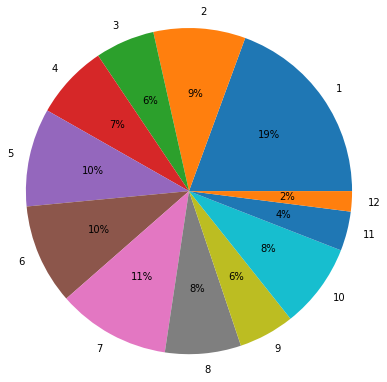

In [96]:
grp_baseline_cr_date_mnth=train_set.groupby('baseline_create_date_month')['target_delay'].agg({'mean'}).reset_index()
plt.figure(figsize=(5,5))
plt.pie(grp_baseline_cr_date_mnth['mean'],labels=grp_baseline_cr_date_mnth['baseline_create_date_month'],autopct='%1.0f%%',radius = 1.5)
plt.show()
##shows target_delay mean in percentage in every month wrt baseline_create_date
##we notice that above both the date graphs have nearly similar mean monthly

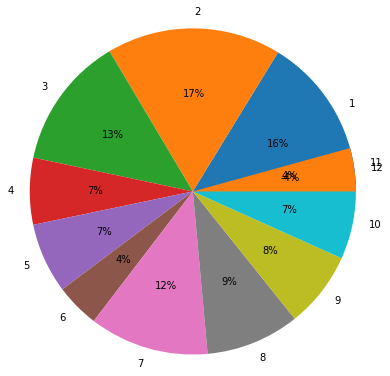

In [97]:
grp_due_in_date_mnth=train_set.groupby('due_in_date_month')['target_delay'].agg({'mean'}).reset_index()
plt.figure(figsize=(5,5))
plt.pie(grp_due_in_date_mnth['mean'],labels=grp_due_in_date_mnth['due_in_date_month'],autopct='%1.0f%%',radius = 1.5)
plt.show()
##shows target_delay mean in percentage in every month wrt due_in_date


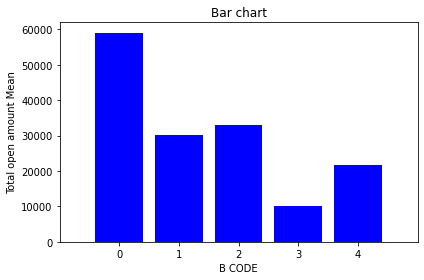

In [98]:
grp_nc=train_set.groupby('business_code')['total_open_amount'].agg({'mean'}).reset_index()

plt.bar(grp_nc['business_code'].astype(int).astype(str),grp_nc['mean'],color = 'b')
plt.xlabel('B CODE')
plt.xlim((-1,grp_nc['business_code'].nunique()))
plt.ylabel('Total open amount Mean')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
###displaying avg total amount for each business code 

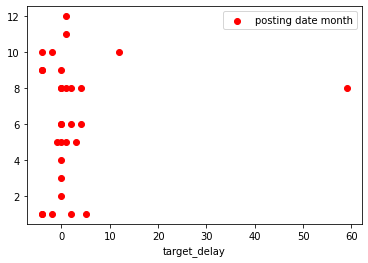

In [99]:
###Scatter plot of posting date month with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['posting_date_month'],color='r',label='posting date month')
plt.xlabel("target_delay")
plt.legend()
plt.show()

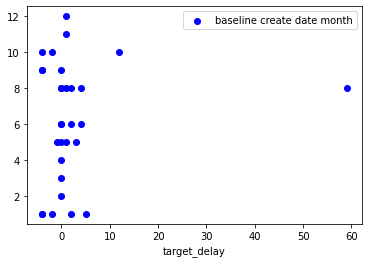

In [100]:
###Scatter plot of baseline create date month with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['baseline_create_date_month'],color='b',label='baseline create date month')
plt.xlabel("target_delay")
plt.legend()
plt.show()

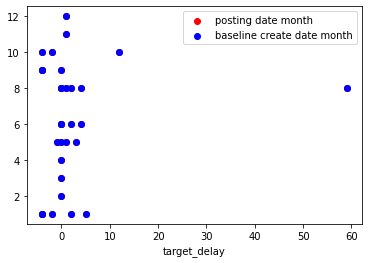

In [101]:
###Scatter plot of posting date month and basline create date with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['posting_date_month'],color='r',label='posting date month')
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['baseline_create_date_month'],color='b',label='baseline create date month')

plt.xlabel("target_delay")
plt.legend()
plt.show()

### We see both the points overlap each other

In [102]:
####Distribution of various columns to check skewness

In [103]:
##SKEWNESS OF DIFFERENT COLUMNS
from scipy.stats import  skew
print("BUSINESS CODE")
print(skew(train_set['business_code'])) ##highly positive

BUSINESS CODE
3.3282343258536025


In [104]:
from scipy.stats import  skew
print("CUSTOMER NUMBER")
print(skew(train_set['cust_number'])) ##highly positive

CUSTOMER NUMBER
5.021526311049423


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd65604e6d8>,
      dtype=object)

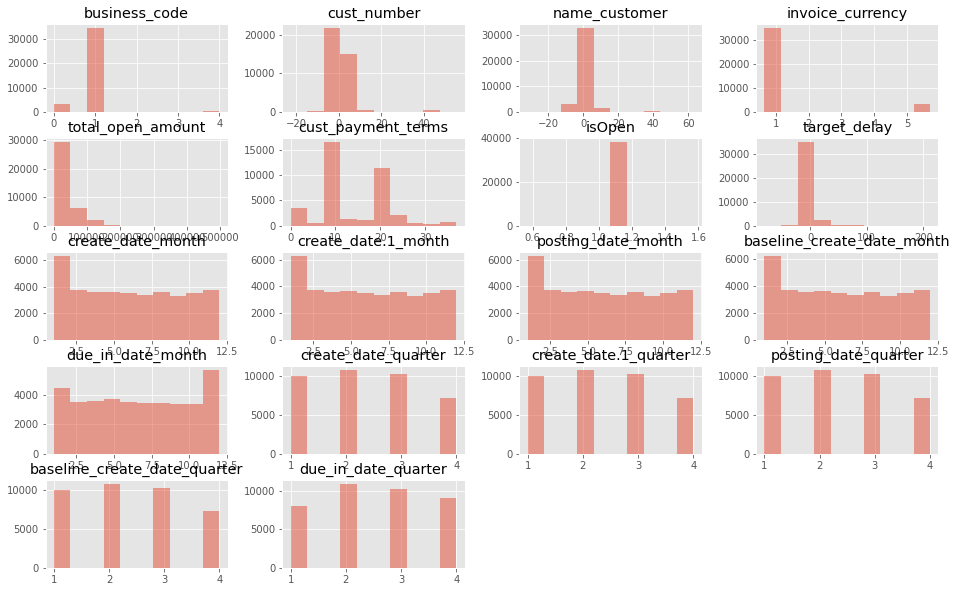

In [105]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')
train_set.hist(alpha=0.5, figsize=(16, 10))

In [106]:
from scipy.stats import  skew
print("Customer Name")
print(skew(train_set['name_customer']))   ##highly positive

Customer Name
4.8861533547198075


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


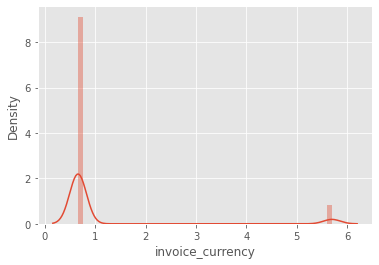

In [107]:
sns.distplot(train_set['invoice_currency'])

In [108]:
from scipy.stats import  skew
print("Invoice Currency")
print(skew(train_set['invoice_currency'])) ##highly positive

Invoice Currency
3.064884798180715


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


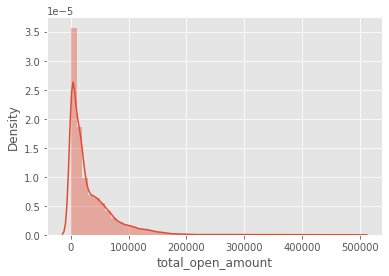

In [110]:
sns.distplot(train_set['total_open_amount'])

In [111]:
from scipy.stats import  skew
print("Total Open Amount")
print(skew(train_set['total_open_amount']))  ##highly positive


Total Open Amount
2.543577309637194


In [112]:
from scipy.stats import  skew
print("Customer Payment Terms")
print(skew(train_set['cust_payment_terms']))    #less positively skewed

Customer Payment Terms
0.4037877640607491


In [113]:
from scipy.stats import  skew
print("Is Open")
print(skew(train_set['isOpen']))    

Is Open
0.0


In [114]:
print("Baseline Create month ")
print(skew(train_set['baseline_create_date_month']))    

Baseline Create month 
0.024543213703139975


In [115]:
print("Baseline Create Quarter")
print(skew(train_set['baseline_create_date_quarter']))    

Baseline Create Quarter
0.1193722281398001


In [116]:
print("Create Date Month.1 month ")
print(skew(train_set['create_date.1_month']))    

Create Date Month.1 month 
0.024160104571675074


In [117]:
print("Create date month.1 quarter ")
print(skew(train_set['create_date.1_quarter']))    

Create date month.1 quarter 
0.12118298300798952


In [118]:
####Skewness of columns which have high correlation with target label will not be altered

In [119]:
###invoice currency is highly positively skewed and it is less correlated with target delay so we apply squarert transformation
train_set['invoice_currency']=np.sqrt(train_set['invoice_currency'])

print(skew(train_set['invoice_currency']))  ###no change 

3.0648847981807137


In [120]:
train_set['total_open_amount']=np.sqrt(train_set['total_open_amount'])

print(skew(train_set['total_open_amount']))  ###skewness reduced


0.7744150889941419


In [121]:
#train_set['cust_payment_terms']=np.sqrt(train_set['cust_payment_terms'])

#print(skew(train_set['cust_payment_terms']))  ###skewness reduced

In [122]:
train_set.dtypes

business_code                            int64
cust_number                            float64
name_customer                          float64
clear_date                      datetime64[ns]
doc_id                                  object
posting_date                    datetime64[ns]
document_create_date            datetime64[ns]
document_create_date.1          datetime64[ns]
due_in_date                     datetime64[ns]
invoice_currency                       float64
total_open_amount                      float64
baseline_create_date            datetime64[ns]
cust_payment_terms                       int64
isOpen                                 float64
target_delay                             int64
create_date_month                        int64
create_date.1_month                      int64
posting_date_month                       int64
baseline_create_date_month               int64
due_in_date_month                        int64
create_date_quarter                      int64
create_date.1

In [123]:
train_set['doc_id'].unique

<bound method Series.unique of 0        1.92986e+09
1        1.92979e+09
3        1.92952e+09
4        1.92946e+09
5        1.92948e+09
            ...     
45458     1.9288e+09
45460    1.92977e+09
45461    2.96054e+09
45462    1.92865e+09
45463    1.92956e+09
Name: doc_id, Length: 38158, dtype: object>

In [124]:
###doc_id is primary key so drop
train_set.drop(['doc_id'],axis=1,inplace=True)

In [125]:
#remove outliers from target_delay
q1=train_set.target_delay.quantile(0.25)
q3=train_set.target_delay.quantile(0.75)
q1,q3

(-3.0, 2.0)

In [126]:
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
lower_limit,upper_limit

(-10.5, 9.5)

In [127]:
train_set[(train_set.target_delay<lower_limit)|(train_set.target_delay>upper_limit)] ##outlier

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay,create_date_month,create_date.1_month,posting_date_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
22,4,2.436872,2.243023,2019-11-26,2019-08-14,2019-08-12,2019-08-14,2019-09-28,0.811971,155.393404,2019-08-14,28,1.068714,59,8,8,8,8,9,3,3,3,3,3
30,0,3.408100,2.628571,2019-11-01,2019-10-01,2019-10-01,2019-10-01,2019-10-20,2.386880,51.687426,2019-10-10,1,1.068714,12,10,10,10,10,10,4,4,4,4,4
59,1,2.436872,2.243023,2019-12-20,2019-11-22,2019-11-17,2019-11-22,2019-12-07,0.811971,73.209289,2019-11-22,9,1.068714,13,11,11,11,11,12,4,4,4,4,4
87,1,42.690346,43.019608,2019-06-28,2019-05-24,2019-05-22,2019-05-24,2019-05-24,0.811971,210.933852,2019-05-24,36,1.068714,35,5,5,5,5,5,2,2,2,2,2
105,1,42.690346,41.822222,2019-08-02,2019-06-02,2019-06-03,2019-06-02,2019-06-02,0.811971,264.442810,2019-06-02,36,1.068714,61,6,6,6,6,6,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45394,4,30.500000,2.243023,2019-08-14,2019-05-01,2019-05-01,2019-05-01,2019-06-15,0.811971,127.539053,2019-05-01,28,1.068714,60,5,5,5,5,6,2,2,2,2,2
45402,4,2.436872,2.243023,2019-07-02,2019-04-21,2019-04-17,2019-04-21,2019-06-20,0.811971,235.946265,2019-04-21,26,1.068714,12,4,4,4,4,6,2,2,2,2,2
45418,1,-1.260870,-18.500000,2019-07-05,2019-06-19,2019-06-19,2019-06-19,2019-09-17,0.811971,37.378470,2019-06-19,32,1.068714,-74,6,6,6,6,9,2,2,2,2,3
45432,1,42.690346,43.129630,2019-08-30,2019-07-07,2019-07-03,2019-07-07,2019-07-07,0.811971,40.286971,2019-07-07,36,1.068714,54,7,7,7,7,7,3,3,3,3,3


In [128]:
train_set=train_set[(train_set.target_delay>lower_limit)&(train_set.target_delay<upper_limit)] ##removr outlier
train_set.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay,create_date_month,create_date.1_month,posting_date_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
0,1,1.529248,2.076923,2019-09-26,2019-09-11,2019-09-10,2019-09-11,2019-09-26,0.811971,227.694444,2019-09-11,9,1.068714,0,9,9,9,9,9,3,3,3,3,3
1,1,0.043478,0.078947,2019-09-10,2019-08-25,2019-08-24,2019-08-25,2019-09-09,0.811971,249.219562,2019-08-25,14,1.068714,1,8,8,8,8,9,3,3,3,3,3
2,1,2.436872,2.243023,2019-08-21,2019-06-20,2019-06-20,2019-06-20,2019-08-19,0.811971,37.187901,2019-06-20,31,1.068714,2,6,6,6,6,8,2,2,2,2,3
3,1,0.678571,1.133333,2019-06-26,2019-06-07,2019-06-07,2019-06-07,2019-06-22,0.811971,292.245222,2019-06-07,9,1.068714,4,6,6,6,6,6,2,2,2,2,2
4,1,-0.266667,-0.333333,2019-06-27,2019-06-12,2019-06-12,2019-06-12,2019-06-27,0.811971,217.066050,2019-06-12,9,1.068714,0,6,6,6,6,6,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35150,1,-2.085551,-2.286070,2019-02-27,2019-02-15,2019-02-14,2019-02-15,2019-03-02,0.811971,102.155568,2019-02-15,21,1.068714,-3,2,2,2,2,3,1,1,1,1,1
35151,1,1.800000,0.812500,2019-10-30,2019-08-27,2019-08-21,2019-08-27,2019-10-31,0.811971,109.311893,2019-08-27,20,1.068714,-1,8,8,8,8,10,3,3,3,3,4
35152,0,2.436872,2.243023,2019-05-09,2019-04-24,2019-04-24,2019-04-24,2019-05-06,2.386880,165.653403,2019-04-26,1,1.068714,3,4,4,4,4,5,2,2,2,2,2
35153,1,2.436872,4.714286,2019-02-13,2019-01-24,2019-01-21,2019-01-24,2019-02-08,0.811971,118.219922,2019-01-24,9,1.068714,5,1,1,1,1,2,1,1,1,1,1


In [129]:
###Graph between create date.1 and posting date whith target variable

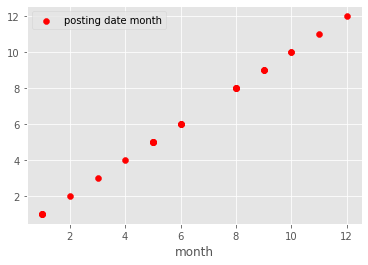

In [130]:
plt.scatter(train_set[:30]['create_date.1_month'], train_set[:30]['posting_date_month'],color='r',label='posting date month')

plt.xlabel("month")
plt.legend()
plt.show()


In [131]:
#corr is 1.00 and graph shows their strongly related so dropping posting_date_month
c1=train_set['posting_date_month'].corr(train_set['baseline_create_date_month'])
c2=train_set['posting_date_month'].corr(train_set['target_delay'])
c1,c2

(0.9988543800440378, -0.0013519257795492597)

In [132]:
train_set.drop(['posting_date_month'],axis=1,inplace=True)
train_set

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay,create_date_month,create_date.1_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
0,1,1.529248,2.076923,2019-09-26,2019-09-11,2019-09-10,2019-09-11,2019-09-26,0.811971,227.694444,2019-09-11,9,1.068714,0,9,9,9,9,3,3,3,3,3
1,1,0.043478,0.078947,2019-09-10,2019-08-25,2019-08-24,2019-08-25,2019-09-09,0.811971,249.219562,2019-08-25,14,1.068714,1,8,8,8,9,3,3,3,3,3
3,1,2.436872,2.243023,2019-08-21,2019-06-20,2019-06-20,2019-06-20,2019-08-19,0.811971,37.187901,2019-06-20,31,1.068714,2,6,6,6,8,2,2,2,2,3
4,1,0.678571,1.133333,2019-06-26,2019-06-07,2019-06-07,2019-06-07,2019-06-22,0.811971,292.245222,2019-06-07,9,1.068714,4,6,6,6,6,2,2,2,2,2
5,1,-0.266667,-0.333333,2019-06-27,2019-06-12,2019-06-12,2019-06-12,2019-06-27,0.811971,217.066050,2019-06-12,9,1.068714,0,6,6,6,6,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,1,-2.085551,-2.286070,2019-02-27,2019-02-15,2019-02-14,2019-02-15,2019-03-02,0.811971,102.155568,2019-02-15,21,1.068714,-3,2,2,2,3,1,1,1,1,1
45460,1,1.800000,0.812500,2019-10-30,2019-08-27,2019-08-21,2019-08-27,2019-10-31,0.811971,109.311893,2019-08-27,20,1.068714,-1,8,8,8,10,3,3,3,3,4
45461,0,2.436872,2.243023,2019-05-09,2019-04-24,2019-04-24,2019-04-24,2019-05-06,2.386880,165.653403,2019-04-26,1,1.068714,3,4,4,4,5,2,2,2,2,2
45462,1,2.436872,4.714286,2019-02-13,2019-01-24,2019-01-21,2019-01-24,2019-02-08,0.811971,118.219922,2019-01-24,9,1.068714,5,1,1,1,2,1,1,1,1,1


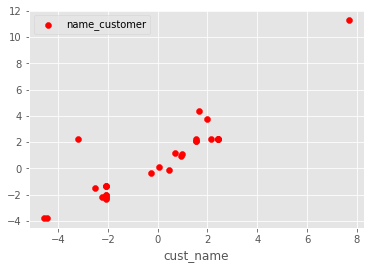

In [133]:
plt.scatter(train_set[:30]['cust_number'], train_set[:30]['name_customer'],color='r',label='name_customer')
plt.xlabel("cust_name")
plt.legend()
plt.show()


In [134]:
##invoice currency is correlated to cust_payment_terms and dose not correlate much with target_delay

In [135]:
c1=train_set['invoice_currency'].corr(train_set['cust_payment_terms'])
c2=train_set['invoice_currency'].corr(train_set['target_delay'])
c3=train_set['cust_payment_terms'].corr(train_set['target_delay'])
c1,c2,c3

(-0.4932555479270314, 0.2616716711811289, -0.4528941233016196)

In [136]:
train_set.drop(['invoice_currency'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [137]:
##baseline_create_date_month is correlated create_date_month.1

In [138]:
c1=train_set['baseline_create_date_month'].corr(train_set['create_date.1_month'])
c2=train_set['baseline_create_date_month'].corr(train_set['target_delay'])
c1,c2

(0.9988543800440378, 8.728527724038855e-05)

In [139]:
train_set.drop(['baseline_create_date_month'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [140]:
##baseline_create_date_quarter is correlated create_date_month.1

In [141]:
c1=train_set['baseline_create_date_quarter'].corr(train_set['create_date.1_month'])
c2=train_set['baseline_create_date_quarter'].corr(train_set['target_delay'])
c1,c2

(0.9674615289881496, 0.002221675590943716)

In [142]:
train_set.drop(['baseline_create_date_quarter'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
##due_in_date_month is correlated create_date_month.1

In [144]:
c1=train_set['due_in_date_quarter'].corr(train_set['create_date.1_month'])
c2=train_set['due_in_date_quarter'].corr(train_set['target_delay'])
c3=train_set['create_date.1_month'].corr(train_set['target_delay'])
c1,c2,c3

(0.9356095253624668, 0.0035734778698867558, -0.0013519257795492597)

In [145]:
##create_date_month is correlated due_in_date_month

In [146]:
c1=train_set['create_date_month'].corr(train_set['due_in_date_month'])
c2=train_set['create_date_month'].corr(train_set['target_delay'])
c3=train_set['due_in_date_month'].corr(train_set['target_delay'])
c1,c2,c3

(0.946330480546937, -0.0003069264721686218, 0.004306381270408235)

In [147]:
train_set.drop(['create_date_quarter'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
train_set

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay,create_date_month,create_date.1_month,due_in_date_month,create_date.1_quarter,posting_date_quarter,due_in_date_quarter
0,1,1.529248,2.076923,2019-09-26,2019-09-11,2019-09-10,2019-09-11,2019-09-26,227.694444,2019-09-11,9,1.068714,0,9,9,9,3,3,3
1,1,0.043478,0.078947,2019-09-10,2019-08-25,2019-08-24,2019-08-25,2019-09-09,249.219562,2019-08-25,14,1.068714,1,8,8,9,3,3,3
3,1,2.436872,2.243023,2019-08-21,2019-06-20,2019-06-20,2019-06-20,2019-08-19,37.187901,2019-06-20,31,1.068714,2,6,6,8,2,2,3
4,1,0.678571,1.133333,2019-06-26,2019-06-07,2019-06-07,2019-06-07,2019-06-22,292.245222,2019-06-07,9,1.068714,4,6,6,6,2,2,2
5,1,-0.266667,-0.333333,2019-06-27,2019-06-12,2019-06-12,2019-06-12,2019-06-27,217.066050,2019-06-12,9,1.068714,0,6,6,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,1,-2.085551,-2.286070,2019-02-27,2019-02-15,2019-02-14,2019-02-15,2019-03-02,102.155568,2019-02-15,21,1.068714,-3,2,2,3,1,1,1
45460,1,1.800000,0.812500,2019-10-30,2019-08-27,2019-08-21,2019-08-27,2019-10-31,109.311893,2019-08-27,20,1.068714,-1,8,8,10,3,3,4
45461,0,2.436872,2.243023,2019-05-09,2019-04-24,2019-04-24,2019-04-24,2019-05-06,165.653403,2019-04-26,1,1.068714,3,4,4,5,2,2,2
45462,1,2.436872,4.714286,2019-02-13,2019-01-24,2019-01-21,2019-01-24,2019-02-08,118.219922,2019-01-24,9,1.068714,5,1,1,2,1,1,1


In [149]:
c1=train_set['posting_date_quarter'].corr(train_set['due_in_date_quarter'])
c2=train_set['posting_date_quarter'].corr(train_set['target_delay'])
c3=train_set['due_in_date_quarter'].corr(train_set['target_delay'])
c1,c2,c3

(0.9258164108480237, 0.00167020539533272, 0.0035734778698867558)

In [150]:
##featues of posting date doesnot seem useful
train_set.drop(['posting_date'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [151]:
train_set.shape

(35155, 18)

In [152]:
###########Feature Selection##########

In [153]:
x_train=train_set.copy()
x_train=x_train.drop(['target_delay'],axis=1)

In [154]:
def handling_correlation(df,threshold=0.8):   #correlation less than threshold
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [155]:
handling_correlation(train_set.copy(),0.80)

['due_in_date_quarter',
 'create_date.1_quarter',
 'name_customer',
 'posting_date_quarter',
 'due_in_date_month',
 'create_date.1_month']

In [156]:
x_train_new=x_train.drop(['due_in_date_quarter','create_date.1_quarter'],axis=1)
train_set=train_set.drop(['due_in_date_quarter','create_date.1_quarter'],axis=1)

In [157]:
handling_correlation(x_train_new.copy(),0.80)

['due_in_date_month',
 'posting_date_quarter',
 'create_date.1_month',
 'name_customer']

In [158]:
x_train_new=x_train_new.drop(['posting_date_quarter'],axis=1)
train_set=train_set.drop(['posting_date_quarter'],axis=1)

In [159]:
y=train_set['target_delay']
y

0        0
1        1
3        2
4        4
5        0
        ..
45458   -3
45460   -1
45461    3
45462    5
45463    4
Name: target_delay, Length: 35155, dtype: int64

In [160]:
x_train_new=x_train_new.drop(['clear_date','due_in_date','document_create_date.1','document_create_date','baseline_create_date'],axis=1)
x_train_new

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,isOpen,create_date_month,create_date.1_month,due_in_date_month
0,1,1.529248,2.076923,227.694444,9,1.068714,9,9,9
1,1,0.043478,0.078947,249.219562,14,1.068714,8,8,9
3,1,2.436872,2.243023,37.187901,31,1.068714,6,6,8
4,1,0.678571,1.133333,292.245222,9,1.068714,6,6,6
5,1,-0.266667,-0.333333,217.066050,9,1.068714,6,6,6
...,...,...,...,...,...,...,...,...,...
45458,1,-2.085551,-2.286070,102.155568,21,1.068714,2,2,3
45460,1,1.800000,0.812500,109.311893,20,1.068714,8,8,10
45461,0,2.436872,2.243023,165.653403,1,1.068714,4,4,5
45462,1,2.436872,4.714286,118.219922,9,1.068714,1,1,2


In [161]:
x_train_new

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,isOpen,create_date_month,create_date.1_month,due_in_date_month
0,1,1.529248,2.076923,227.694444,9,1.068714,9,9,9
1,1,0.043478,0.078947,249.219562,14,1.068714,8,8,9
3,1,2.436872,2.243023,37.187901,31,1.068714,6,6,8
4,1,0.678571,1.133333,292.245222,9,1.068714,6,6,6
5,1,-0.266667,-0.333333,217.066050,9,1.068714,6,6,6
...,...,...,...,...,...,...,...,...,...
45458,1,-2.085551,-2.286070,102.155568,21,1.068714,2,2,3
45460,1,1.800000,0.812500,109.311893,20,1.068714,8,8,10
45461,0,2.436872,2.243023,165.653403,1,1.068714,4,4,5
45462,1,2.436872,4.714286,118.219922,9,1.068714,1,1,2


In [162]:
###############checking feature importance
def tree_based_feature_importance(x_train,y):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

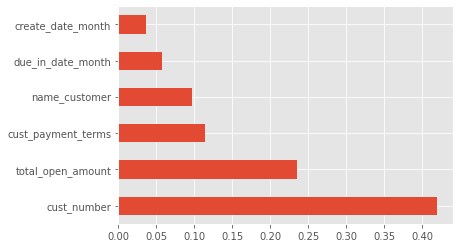

In [163]:
feature_importance=tree_based_feature_importance(x_train_new,y)#features importance data frame

In [164]:
display(feature_importance)

,Features,Importances
1,cust_number,0.419597
3,total_open_amount,0.235157
4,cust_payment_terms,0.113503
2,name_customer,0.096741
8,due_in_date_month,0.056877
6,create_date_month,0.036914
7,create_date.1_month,0.035917
0,business_code,0.005294
5,isOpen,0.000000


In [ ]:
x_train_new=x_train_new.drop(['isOpen','business_code','create_date_month','create_date.1_month'],axis=1)
train_set=train_set.drop(['isOpen','business_code','create_date_month','create_date.1_month'],axis=1)


In [169]:
train_set

,cust_number,name_customer,clear_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,target_delay,due_in_date_month
0,1.529248,2.076923,2019-09-26,2019-09-10,2019-09-11,2019-09-26,227.694444,2019-09-11,9,0,9
1,0.043478,0.078947,2019-09-10,2019-08-24,2019-08-25,2019-09-09,249.219562,2019-08-25,14,1,9
3,2.436872,2.243023,2019-08-21,2019-06-20,2019-06-20,2019-08-19,37.187901,2019-06-20,31,2,8
4,0.678571,1.133333,2019-06-26,2019-06-07,2019-06-07,2019-06-22,292.245222,2019-06-07,9,4,6
5,-0.266667,-0.333333,2019-06-27,2019-06-12,2019-06-12,2019-06-27,217.066050,2019-06-12,9,0,6
...,...,...,...,...,...,...,...,...,...,...,...
45458,-2.085551,-2.286070,2019-02-27,2019-02-14,2019-02-15,2019-03-02,102.155568,2019-02-15,21,-3,3
45460,1.800000,0.812500,2019-10-30,2019-08-21,2019-08-27,2019-10-31,109.311893,2019-08-27,20,-1,10
45461,2.436872,2.243023,2019-05-09,2019-04-24,2019-04-24,2019-05-06,165.653403,2019-04-26,1,3,5
45462,2.436872,4.714286,2019-02-13,2019-01-21,2019-01-24,2019-02-08,118.219922,2019-01-24,9,5,2


In [170]:
x_train_new

,cust_number,name_customer,total_open_amount,cust_payment_terms,due_in_date_month
0,1.529248,2.076923,227.694444,9,9
1,0.043478,0.078947,249.219562,14,9
3,2.436872,2.243023,37.187901,31,8
4,0.678571,1.133333,292.245222,9,6
5,-0.266667,-0.333333,217.066050,9,6
...,...,...,...,...,...
45458,-2.085551,-2.286070,102.155568,21,3
45460,1.800000,0.812500,109.311893,20,10
45461,2.436872,2.243023,165.653403,1,5
45462,2.436872,4.714286,118.219922,9,2


In [171]:
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35155 entries, 0 to 45463
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cust_number         35155 non-null  float64
 1   name_customer       35155 non-null  float64
 2   total_open_amount   35155 non-null  float64
 3   cust_payment_terms  35155 non-null  int64  
 4   due_in_date_month   35155 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.6 MB


In [172]:
x_train_new['cust_number'].isnull().sum() 

0

In [173]:
test_data['due_in_date_month']=test_data['due_in_date'].dt.month
val1['due_in_date_month']=val1['due_in_date'].dt.month
val2['due_in_date_month']=val2['due_in_date'].dt.month


#test_data['create_date.1_month']=test_data['document_create_date.1'].dt.month
#val1['create_date.1_month']=val1['document_create_date.1'].dt.month
#val2['create_date.1_month']=val2['document_create_date.1'].dt.month


In [174]:
####Model

In [175]:
import warnings
warnings.filterwarnings('ignore')
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [176]:
# Fitting Simple Linear Regression to the Training Set
#Algorithm.append('Linear Regression')
#clf = LinearRegression()
#clf.fit(x_train_new, y)

In [177]:
#predicted = clf.predict(x_train_new)

In [178]:
x_val1=val1.copy()
x_val1=x_val1.drop(['target_delay'],axis=1)


In [179]:
x_val1_new=x_val1.drop(['clear_date','due_in_date','document_create_date','document_create_date.1','posting_date','baseline_create_date','isOpen','business_code','buisness_year','doc_id','invoice_currency'],axis=1)

In [180]:
y_val1=val1['target_delay']

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # create an instance
x_train_new_scaled = scaler.fit_transform(x_train_new) #  fit  the scaler to the train set and then transform it
x_val1_new_scaled = scaler.transform(x_val1_new) 

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_new_scaled = scaler.fit_transform(x_train_new_scaled) #  fit  the scaler to the train set and then transform it
x_val1_new_scaled = scaler.transform(x_val1_new_scaled) 

In [188]:
#Algorithm.append('Linear Regression')
#clf = LinearRegression()
#clf.fit(x_train_new_scaled, y)

In [186]:
#predicted = clf.predict(x_train_new_scaled)

In [189]:
#t1=mean_squared_error(y, predicted)
#t2=r2_score(y, predicted)
#t1,t2

In [190]:
#predicte = clf.predict(x_val1_new_scaled)
#t1=mean_squared_error(y_val1, predicte)
#t2=r2_score(y_val1, predicte)
#t1,t2

In [191]:
x_val2=val2.copy()
x_val2=x_val2.drop(['target_delay'],axis=1)


In [192]:
x_val2_new=x_val2.drop(['clear_date','due_in_date','document_create_date','document_create_date.1','posting_date','baseline_create_date','isOpen','business_code','buisness_year','doc_id','invoice_currency'],axis=1)

In [193]:
y_val2=val2['target_delay']

In [194]:
x_val2_new_scaled = scaler.transform(x_val2_new)

In [195]:
scaler = StandardScaler()
x_train_new_scaled = scaler.fit_transform(x_train_new_scaled) #  fit  the scaler to the train set and then transform it

x_val2_new_scaled = scaler.transform(x_val2_new_scaled) 

In [196]:
#Algorithm.append('Linear Regression')
#clf = LinearRegression()
#clf.fit(x_train_new_scaled, y)

In [197]:
#predicted = clf.predict(x_train_new_scaled)

In [198]:
#t1=mean_squared_error(y, predicted)
#t2=r2_score(y, predicted)
#t1,t2

In [199]:
#predicte = clf.predict(x_val2_new_scaled)
#t1=mean_squared_error(y_val2, predicte)
#t2=r2_score(y_val2, predicte)
#t1,t2

In [200]:
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train_new_scaled, y)

# Predicting the Test Set Results
predicted = clf.predict(x_train_new_scaled)

NameError: ignored

In [201]:
t1=mean_squared_error(y, predicted)
t2=r2_score(y, predicted)
t1,t2

NameError: ignored

In [ ]:
predicted = clf.predict(x_val1_new_scaled)
t2=r2_score(y_val1, predicted)
t1,t2

In [ ]:
predicted = clf.predict(x_val2_new_scaled)
t2=r2_score(y_val2, predicted)
t1,t2

In [ ]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train_new_scaled, y)

# Predicting the Test Set Results
predicted = clf.predict(x_train_new_scaled)

In [ ]:
t1=mean_squared_error(y, predicted)
t2=r2_score(y, predicted)
t1,t2

In [ ]:
predicted = clf.predict(x_val1_new_scaled)
t2=r2_score(y_val1, predicted)
t1,t2

In [ ]:
predicted = clf.predict(x_val2_new_scaled)
t2=r2_score(y_val2, predicted)
t1,t2